Prepare rules for the all the data sets \
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values\
2) Change the minimum length in apriori algorithm\
3) Visulize the obtained rules using different plots

In [1]:
!pip install mlxtend

In [2]:
import mlxtend

In [3]:
# importing libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import matplotlib.pyplot as plt

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# uploading dataset
from google.colab import files
uploaded=files.upload()

Saving book.csv to book.csv


In [36]:
# reading dataset
book=pd.read_csv("book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


Data preprocessing not required as it is already in transaction format

# **Apriori Algorithm**

# 1) Association rules with 5% Support and 80% confidence


In [37]:
frequent_itemsets = apriori(book, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, GeogBks, CookBks, YouthBks)"
96,0.0560,"(ArtBks, GeogBks, CookBks, YouthBks)"
97,0.0650,"(DoItYBks, GeogBks, CookBks, ArtBks)"
98,0.0510,"(YouthBks, ChildBks, GeogBks, CookBks, DoItYBks)"


In [38]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
657,(ChildBks),"(DoItYBks, GeogBks, CookBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417
658,(GeogBks),"(DoItYBks, CookBks, ArtBks, ChildBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,0.796923
659,(CookBks),"(DoItYBks, GeogBks, ArtBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050
660,(ArtBks),"(DoItYBks, GeogBks, CookBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307


In [39]:
asso_rules=rules.sort_values('lift',ascending = False)
asso_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
182,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301,0.821427
183,(ItalCook),"(CookBks, YouthBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193,0.776487
511,"(GeogBks, CookBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125,0.852425
510,"(ItalCook, ChildBks)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923,0.752277
513,"(CookBks, ChildBks)","(ItalCook, GeogBks)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474,0.924629
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
14,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
15,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


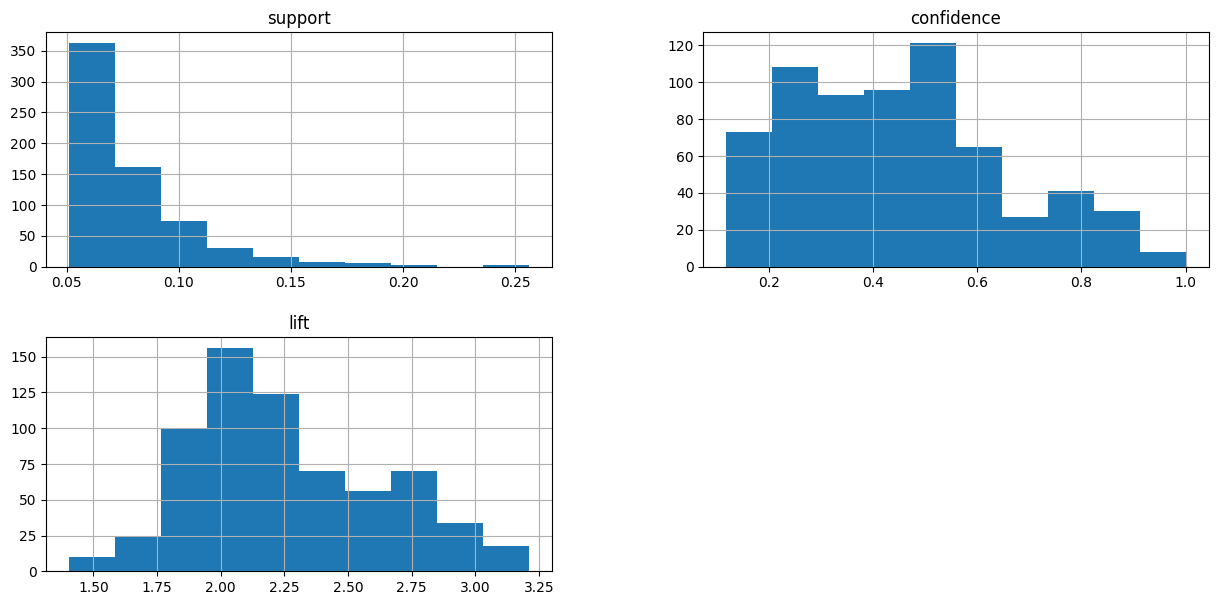

In [41]:
# histogram
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

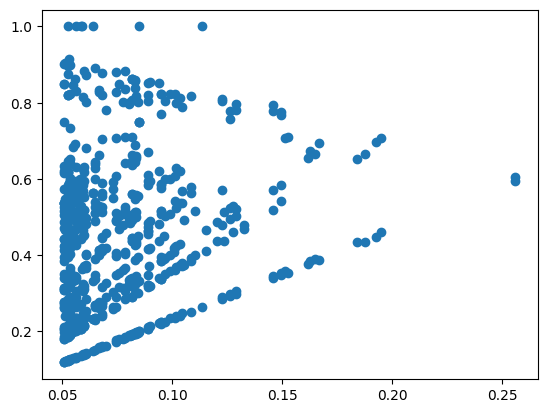

In [42]:
# scatter plot
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7d589a918640>,
 'caps': [<matplotlib.lines.Line2D at 0x7d589a919000>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d589a918490>,
 'medians': [<matplotlib.lines.Line2D at 0x7d589a91b430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d589a91be20>,
 'means': []}

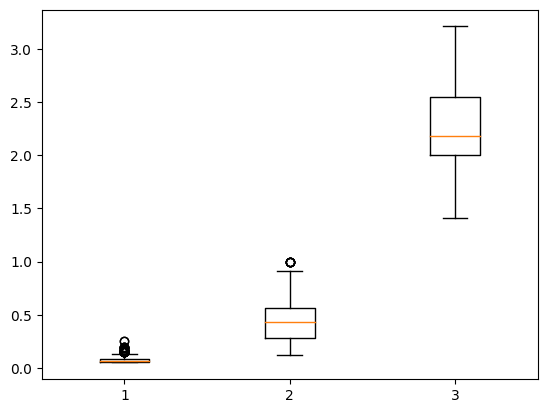

In [43]:
# box plot
plt.boxplot(rules[['support','confidence','lift']],vert = True)

# 2) Association rules with 10% Support and 70% confidence


In [44]:
frequent_itemsets = apriori(book, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [45]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


In [46]:
asso_rules=rules.sort_values('lift',ascending = False)
asso_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


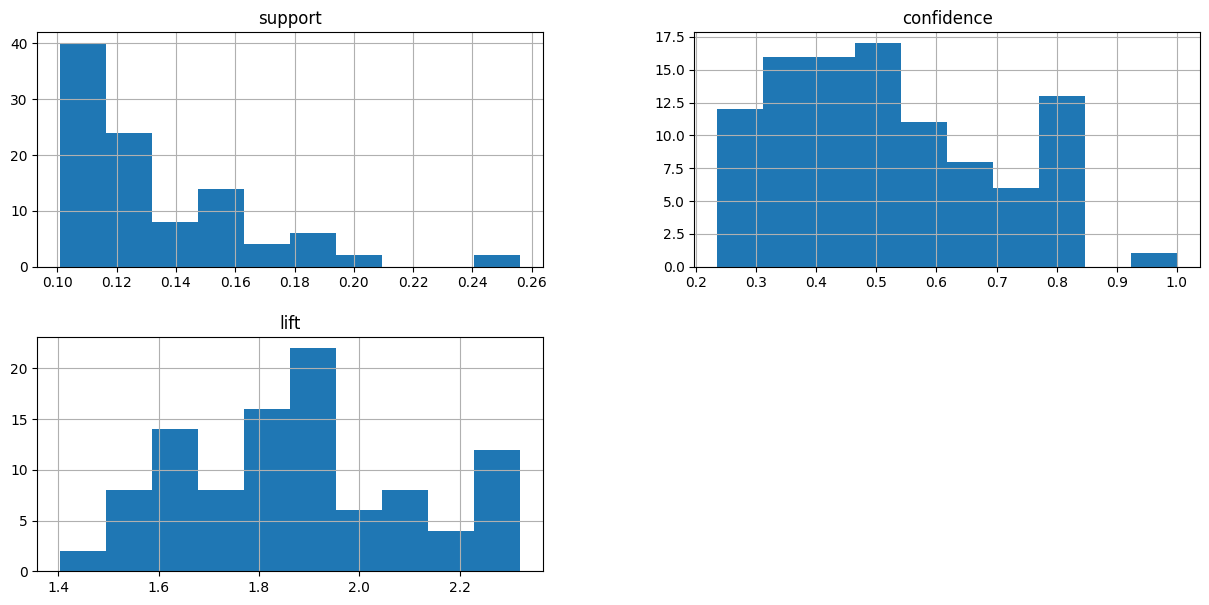

In [47]:
# histogram
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

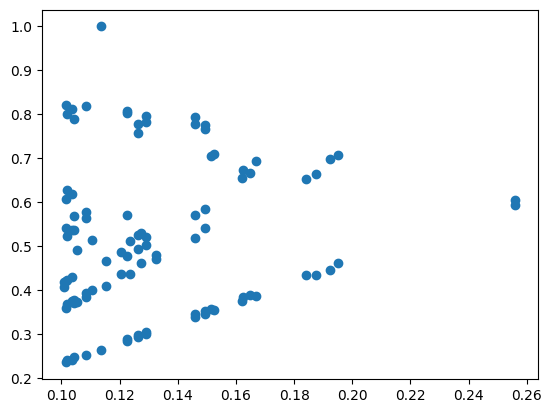

In [48]:
# scatter plot
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7d589a980730>,
 'caps': [<matplotlib.lines.Line2D at 0x7d589a9819f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d589a981a20>,
 'medians': [<matplotlib.lines.Line2D at 0x7d589a982aa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d589a982020>,
 'means': []}

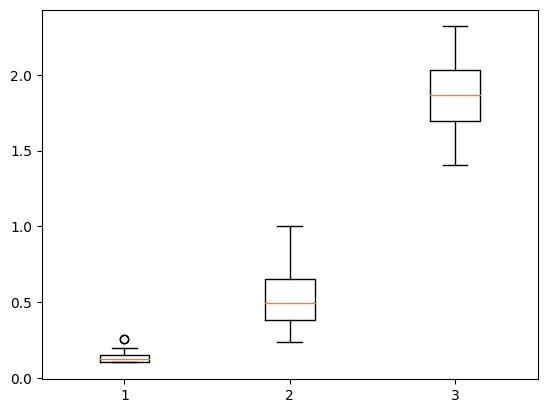

In [49]:
# box plot
plt.boxplot(rules[['support','confidence','lift']],vert = True)

# 3) Association rules with 20% Support and 60% confidence

In [50]:
frequent_itemsets = apriori(book, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [51]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


In [52]:
asso_rules=rules.sort_values('lift',ascending = False)
asso_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


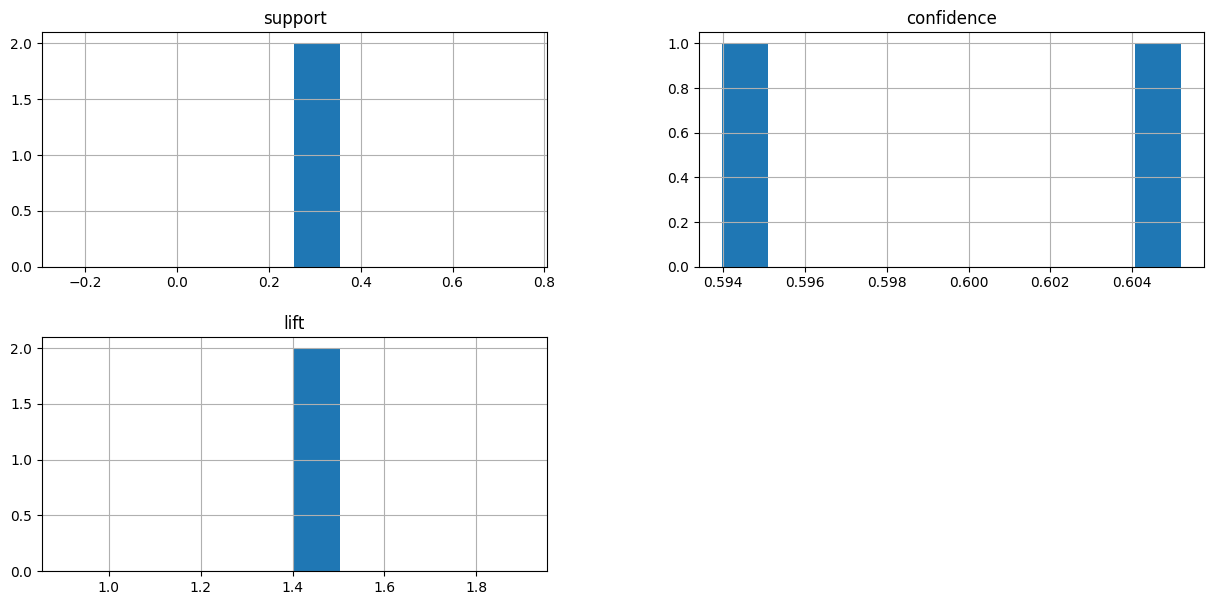

In [53]:
# histogram
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

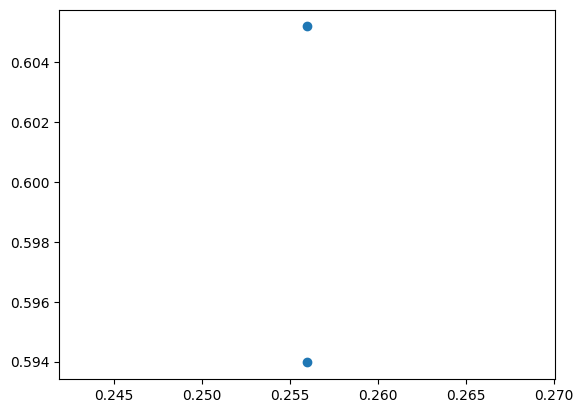

In [54]:
# scatter plot
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7d589a6a0a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7d589a9e63e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d589a6a22c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7d589a99ae60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d589a99b790>,
 'means': []}

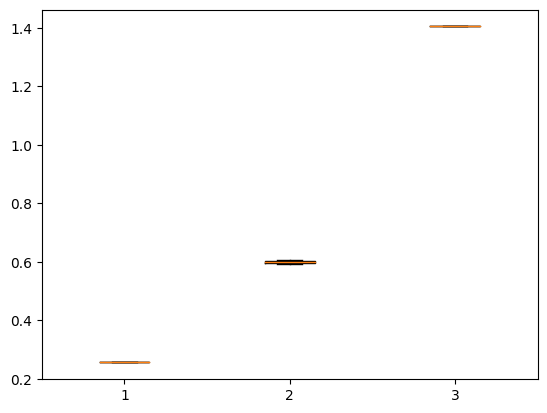

In [55]:
# box plot
plt.boxplot(rules[['support','confidence','lift']],vert = True)